# Generate Sampling Distribution

This workbook walks you through creating a sampling distribution from one synthetic sample distribution, calculating standard deviation and standard error.

## 1: Generate **sample distribution**

The sample distribution is a distribution of values gathered experimentally. In this case, the synthetic sample distribution is normally distributed.

### 1.1: Produce data

In [1]:
# Set parameters for the random sample distribution
n_samples <- 100
mean <- 50
sd <- 6

# Generate the sample distribution
set.seed(0)
sample_dist <- rnorm(n_samples, mean, sd)

# Calculate the standard deviation of the sample distribution
sample_dist_sd <- sd(sample_dist)

### 1.2: Print summary and plot

Theoretical SD: 6 
SD of sample dist: 5.296

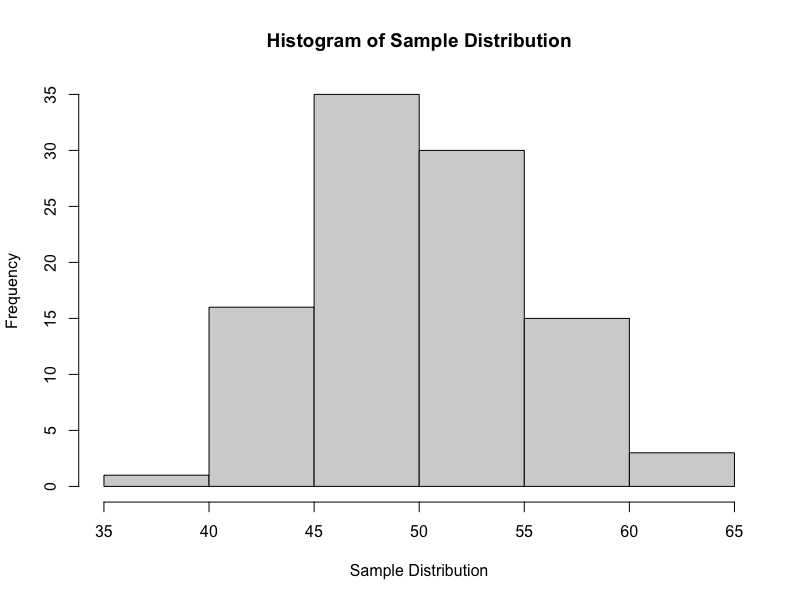

In [2]:
cat("Theoretical SD:", sd, "\n", sep=" ")
cat("SD of sample dist:", round(sample_dist_sd, 3), sep=" ")
hist(sample_dist,
     xlab="Sample Distribution",
     main="Histogram of Sample Distribution"
)

## 2: Generate Standard Error of the Sampling Distribution

The standard error is a property of the sampling distribution, **not** the sample distribution.

### 2.1: Derive SE theoretically

Standard error is defined as

$ SE_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $

In [3]:
se_theoretical <- sample_dist_sd / sqrt(n_samples)

### 2.2: Derive SE using the sampling distribution

The sampling distribution is a distribution of means. If it is generated by bootstrapping, the sample distribution is sampled many times with replacement. With each iteration, the mean of that sample is added to the sampling distribution. Because of the central limit theorem, the sampling distribution is normally distributed. The standard deviation of the sampling distribution is the standard error of the sampling distribution.

In [4]:
# Set parameters for sampling distribution generation through bootstrapping
n_iters <- 50
synthetic_samples <- 75
sampling_dist <- rep(0, n_iters)


# In a loop, sample from the sample distribution
for (i in 1:n_iters) {
  s <- sample(sample_dist, synthetic_samples, replace=T)
  # Append the sample mean to the sampling distribution
  sampling_dist[i] <- mean(s)
}

# Generate the standard error, defined as sd of sampling distribution
se_bootstrapping <- sd(sampling_dist)

### 2.3: Print summary and plot

SE generated theoretically 0.53 
SE generated using bootstrapping 0.566

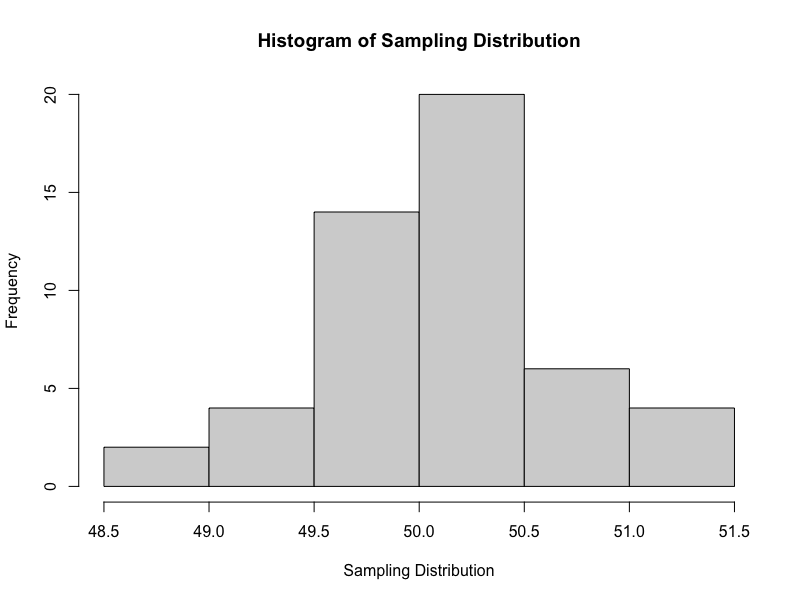

In [5]:
cat("SE generated theoretically", round(se_theoretical, 3), "\n", sep=" ")
cat("SE generated using bootstrapping", round(se_bootstrapping, 3), sep=" ")
hist(sampling_dist,
     xlab="Sampling Distribution",
     main="Histogram of Sampling Distribution"
)